In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1uIKhjCEYkC3nZFBVp592LmgAiA1fv4DH")

In [151]:
df = pd.read_csv("https://cloud.vinhthanh.net/s/3MpCNPWDiH7reec/download/Property%20Sales%20of%20Melbourne%20City.csv")

In [152]:
df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [153]:
df.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [154]:
data = np.array(df["Price"])

In [155]:
data = data[np.logical_not(np.isnan(data))]

In [156]:
mean = np.mean(data)
deviations = [(x - mean) ** 2 for x in data]
variance = sum(deviations) / len(data)

In [157]:
variance

412041026570.23773

In [158]:
M2 = sum((x - mean)**2 for x in data)/len(data)

In [159]:
M2

412041026570.23773

In [160]:
from scipy.stats import kurtosis

In [161]:
def fun_kurtosis(arr):
    mean_ = np.mean(arr)
    median_ = np.median(arr)
#     print("Mean: ",mean_)
#     print("Median: ",median_)
    mu4 = np.mean((arr - mean_)**4)
    mu2 = np.mean((arr-mean_)**2)
    beta2 = mu4 / (mu2**2)
#     print("Beta 2: ",beta2)
    gamma2 = beta2 - 3
    return gamma2

In [162]:
fun_kurtosis(data)

10.36995353231656

In [163]:
print(variance)
print(M2)
print(fun_kurtosis(data))

412041026570.23773
412041026570.23773
10.36995353231656


### Bai 2:

In [164]:
df2 = df[(df["YearBuilt"] > 2010) & (df["Type"] == "t")]

In [165]:
filtered_df = df2.loc[df2['Lattitude'].notnull() & df2['Longtitude'].notnull()]

In [166]:
filtered_df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
52,66,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/09/2016,13.5,...,2.0,1.0,303.0,225.0,2016.0,Moonee Valley,-37.71800,144.87800,Western Metropolitan,3464.0
67,82,Airport West,2/252 Parer Rd,2,t,450000,S,Barry,7/05/2016,13.5,...,1.0,1.0,110.0,90.0,2015.0,Moonee Valley,-37.72160,144.87100,Western Metropolitan,3464.0
192,232,Altona,1/123 Blyth St,2,t,720000,S,hockingstuart,4/02/2016,13.8,...,1.0,2.0,292.0,125.0,2013.0,Hobsons Bay,-37.86870,144.81970,Western Metropolitan,5301.0
441,548,Ascot Vale,3/8 Walter St,2,t,865000,SP,Nelson,18/03/2017,5.9,...,2.0,1.0,146.0,132.0,2015.0,Moonee Valley,-37.77130,144.90380,Western Metropolitan,6567.0
446,553,Ascot Vale,1/20 Newsom St,3,t,1050000,S,Jellis,19/11/2016,5.9,...,2.0,2.0,318.0,160.0,2013.0,Moonee Valley,-37.77440,144.90350,Western Metropolitan,6567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18044,23122,Essendon North,2/9 Grace St,3,t,820000,PI,Brad,26/08/2017,8.2,...,2.0,1.0,NaN,149.0,2012.0,NaN,-37.73566,144.89368,Western Metropolitan,1308.0
18084,23169,Gowanbrae,24 Duranta Dr,4,t,655000,S,Nelson,26/08/2017,12.9,...,3.0,2.0,170.0,215.0,2017.0,NaN,-37.70128,144.90187,Western Metropolitan,1071.0
18239,23354,Notting Hill,2 Reserve Pl,2,t,570500,S,Biggin,26/08/2017,16.7,...,1.0,1.0,NaN,78.0,2014.0,NaN,-37.90597,145.14505,Southern Metropolitan,902.0
18253,23372,Pascoe Vale,1B Braeside St,2,t,636500,S,Barry,26/08/2017,8.5,...,1.0,2.0,NaN,97.0,2012.0,NaN,-37.71874,144.95016,Northern Metropolitan,7485.0


### Bai 3

In [167]:
df3 = df.loc[[105, 106], ['Bedroom2', 'Bathroom', 'Car']]

In [168]:
df3

,Bedroom2,Bathroom,Car
105,4.0,3.0,2.0
106,3.0,1.0,1.0


In [169]:
import plotly.express as px

# vẽ biểu đồ tọa độ song song
fig = px.parallel_coordinates(df3, color='Car', labels={'Bedroom2':'Bedroom', 'Bathroom':'Bathroom', 'Car':'Car'})

# hiển thị biểu đồ
fig.show()

### Bai 4

In [170]:
# Tính histogram và các bin của dữ liệu
hist, bin_edges = np.histogram(data, bins='sturges')

# Tính giá trị lớn nhất của dữ liệu
max_value = np.max(data)

# Tính giá trị 𝑤, 𝑦
w = (bin_edges[-1] - bin_edges[0]) / len(hist)
y = max_value + w / 2

# Tính giá trị 𝑚𝑖𝑛𝑥
minx = np.min(data)

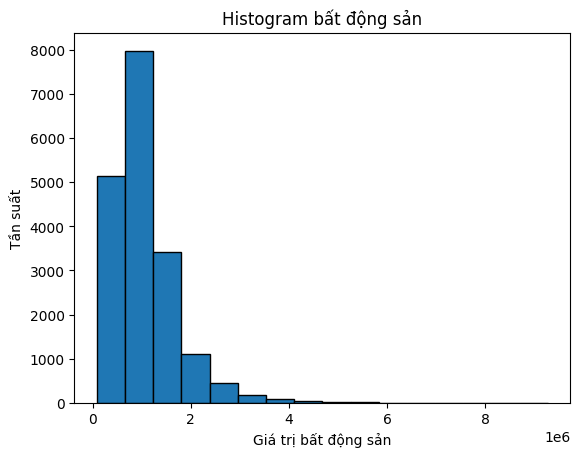

In [171]:
# Vẽ histogram
plt.hist(data, bins=hist.shape[0], range=(minx, y), edgecolor='black')
# plt.axvline(x=minx, color='r', linewidth=2)
plt.xlabel('Giá trị bất động sản')
plt.ylabel('Tần suất')
plt.title('Histogram bất động sản')
plt.show()

### Bai 5

In [132]:
x = np.array(df["BuildingArea"])
y = np.array(df["Landsize"])

In [134]:
nan_indices = np.isnan(x)
x = x[~nan_indices]
y = y[~nan_indices]

In [136]:
nan_indices = np.isnan(y)
x = x[~nan_indices]
y = y[~nan_indices]

In [137]:
coef = np.polyfit(x, y, 1)
beta = coef[0]
intercept = coef[1]
print("Hệ số hồi quy (beta):", beta)
print("Hệ số chắn (intercept):", intercept)

Hệ số hồi quy (beta): 0.9636450275752199
Hệ số chắn (intercept): 343.9288388528961


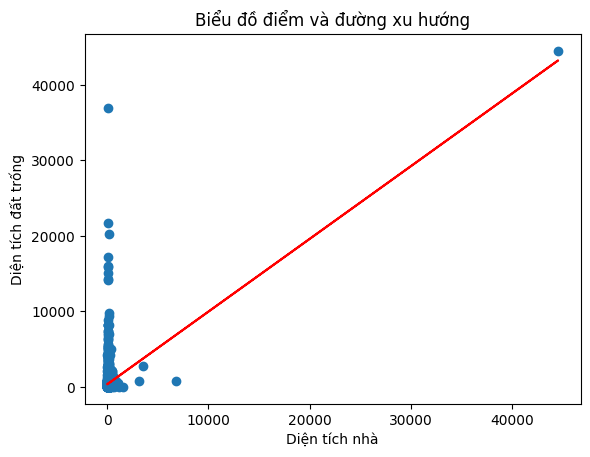

In [138]:
# Vẽ biểu đồ điểm và đường xu hướng
plt.scatter(x, y)
plt.plot(x, beta*x + intercept, color='r')
plt.xlabel('Diện tích nhà')
plt.ylabel('Diện tích đất trống')
plt.title('Biểu đồ điểm và đường xu hướng')
plt.show()